<a href="https://colab.research.google.com/github/RewinaB/HR-Data-Analysis/blob/main/Clustering_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Clustering with PyCaret

Clustering (Unsupervised) is similar to classification (Supervised), but the basis is different. In Clustering you don’t know what you are looking for, and you are trying to identify some segments or clusters in your data. When you use clustering algorithms on your dataset, unexpected things can suddenly pop up like structures, clusters and groupings you would have never thought of otherwise.

PyCaret provides several pre-processing features that prepare the data for modeling through the setup function. It has over 10 ready-to-use algorithms and several plots to analyze the performance of trained models.

In [3]:
# checking PyCaret version
!pip install pycaret
from pycaret.utils import version
version()

'3.3.0'

In [4]:
# Importing dataset
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop('CustomerID', axis=1, inplace=True)

In [6]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## PyCaret

Here is the PyCaret documentation for clustering: https://pycaret.readthedocs.io/en/stable/api/clustering.html#

check model functionalities here: https://github.com/pycaret/pycaret/blob/master/pycaret/clustering/functional.py

In [8]:
from pycaret.clustering import *

In [9]:
df_no_gender = df.drop("Gender", axis=1)
df_no_gender.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [10]:
exp = setup(df_no_gender, session_id=123, normalize_method='zscore', normalize=True)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 3)"
2,Transformed data shape,"(200, 3)"
3,Numeric features,3
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [11]:
# check all available config
exp.get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [12]:
get_config('X_train')


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [13]:
get_config('X_transformed')


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [14]:
exp.models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


* K-Means Clustering (kmeans): This is a widely used clustering method that partitions data into K clusters, where each data point belongs to the cluster with the nearest mean. It works best with numerical datasets and is less effective for categorical data or mixed types without proper preprocessing.

* Affinity Propagation (ap): This method uses message passing between data points to create clusters. Unlike K-means, it doesn't require the number of clusters to be specified in advance. It can work with any similarity matrix and is thus more flexible with different data types, but it might not be as efficient with large datasets.

* Mean Shift Clustering (meanshift): This algorithm finds clusters without specifying the number of clusters in advance. It works by updating candidates for centroids to be the mean of the points within a certain region. It's better suited for continuous data and might not perform well with high-dimensional categorical data.

* Spectral Clustering (sc): Spectral clustering uses eigenvalues of a similarity matrix to reduce dimensions, then applies a clustering method like K-means. It's good for identifying clusters that are not necessarily globular and can handle mixed data types if the similarity matrix is defined appropriately.

* Agglomerative Clustering (hclust): This is a type of hierarchical clustering that merges data points or clusters based on their distance. It's versatile and can work with different distance metrics, making it suitable for mixed data types, though interpretation can become complex.

* Density-Based Spatial Clustering (dbscan): DBSCAN forms clusters based on dense areas of data points. It's good at separating high density clusters from low density areas and can handle outliers well. It's primarily suited for continuous data but can be adapted for mixed types with appropriate distance metrics.

* OPTICS Clustering (optics): Similar to DBSCAN but handles varying densities better. OPTICS is good for spatial data and can identify a range of clustering structures. Like DBSCAN, it's more suited for continuous data.

* Birch Clustering (birch): Designed for very large datasets, Birch incrementally builds a tree-like structure for clustering. It works well with numerical data but is not ideal for categorical data.

* K-Modes Clustering (kmodes): This is specifically designed for categorical data. It uses modes instead of means for clustering and is a good choice if your dataset is predominantly categorical.

In [15]:
kmeans = create_model('kmeans', num_clusters=6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3926,117.0319,0.8441,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [16]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 'auto',
 'random_state': 123,
 'tol': 0.0001,
 'verbose': 0}

In [17]:
kmeans.inertia_

149.39171491141198

## Assigning the labels to the original dataset
This function assigns cluster labels to the dataset for a given model.



In [18]:
kmeans_clusters = assign_model(kmeans)
kmeans_clusters

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,Cluster 2
1,21,15,81,Cluster 2
2,20,16,6,Cluster 4
3,23,16,77,Cluster 2
4,31,17,40,Cluster 2
...,...,...,...,...
195,35,120,79,Cluster 0
196,45,126,28,Cluster 3
197,32,126,74,Cluster 0
198,32,137,18,Cluster 3


## Plot model
This function analyzes the performance of a trained model.

In [19]:
exp.plot_model(kmeans, plot='cluster')

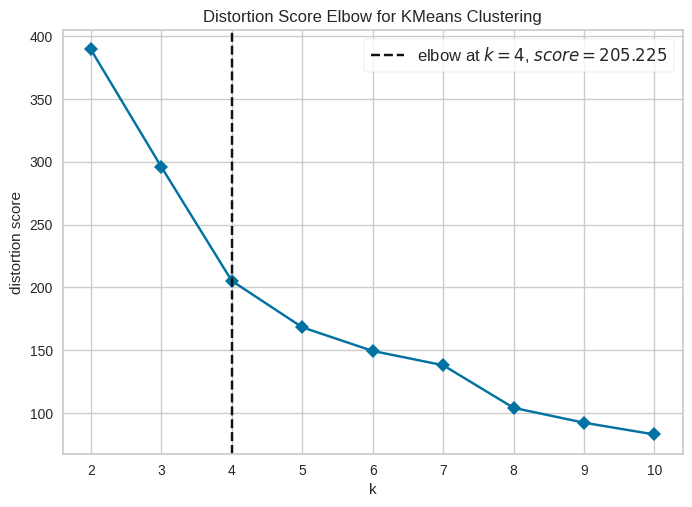

In [20]:
exp.plot_model(kmeans, plot='elbow')

The score referred to here is the "distortion score," which is a measure of the sum of the squared distances between each observation and the centroid of its assigned cluster. In other words, it's a measure of how far away the data points are from the centroids of their clusters.

The Elbow Method involves plotting the number of clusters on the x-axis (k) against the distortion score on the y-axis. As the number of clusters increases, the distortion score will typically decrease because the clusters are smaller and the centroids are closer to the observations.

The "elbow" of the plot is the point where the rate of decrease sharply changes, indicating that additional clusters beyond this point do not contribute significantly to the improvement of the fit. This point is a good balance between the number of clusters and the sum of the distances within the clusters, providing a reasonable partitioning of the data.

In this plot, the "elbow" appears to be at k=4 with a score of approximately 205.225. This suggests that increasing the number of clusters beyond four will not result in significant gains in terms of reducing the distortion score, and thus k=4 is likely a good choice for the number of clusters to use for your K-Means model.

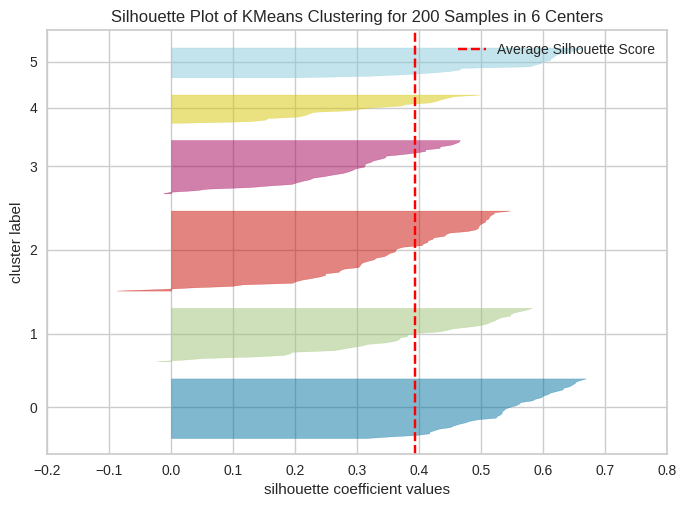

In [21]:
exp.plot_model(kmeans, plot='silhouette')

In [22]:
exp.plot_model(kmeans, plot='distribution')

## Evaluate model
This function displays a user interface for analyzing performance of a trained model. It calls the plot_model function internally.

In [23]:
exp.evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Predict model

predict_model is only useful when you want to obtain cluster labels on unseen data (i.e. data that was not used during training the model).

In [24]:
kmeans_predictions = predict_model(kmeans, data=df_no_gender)
kmeans_predictions

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,Cluster 2
1,-1.281035,-1.738999,1.195704,Cluster 2
2,-1.352802,-1.700830,-1.715913,Cluster 4
3,-1.137502,-1.700830,1.040418,Cluster 2
4,-0.563369,-1.662660,-0.395980,Cluster 2
...,...,...,...,...
195,-0.276302,2.268791,1.118061,Cluster 0
196,0.441365,2.497807,-0.861839,Cluster 3
197,-0.491602,2.497807,0.923953,Cluster 0
198,-0.491602,2.917671,-1.250054,Cluster 3


In [25]:
kmeans_clusters

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,Cluster 2
1,21,15,81,Cluster 2
2,20,16,6,Cluster 4
3,23,16,77,Cluster 2
4,31,17,40,Cluster 2
...,...,...,...,...
195,35,120,79,Cluster 0
196,45,126,28,Cluster 3
197,32,126,74,Cluster 0
198,32,137,18,Cluster 3


In [26]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', KMeans(n_clusters=6, random_state=123))]),
 'kmeans_pipeline.pkl')

In [27]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Age', 'Annual Income (k$)',
                                             'Spending Score (1-100)'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', KMeans(n_clusters=6, random_state=123))])

## Hierarchical clustering


In [28]:
hclust = create_model('hclust', num_clusters=6)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4201,127.9865,0.8521,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [29]:
hclust.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 6}

In [30]:
hclust_clusters = assign_model(hclust)
hclust_clusters

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,Cluster 4
1,21,15,81,Cluster 5
2,20,16,6,Cluster 4
3,23,16,77,Cluster 5
4,31,17,40,Cluster 4
...,...,...,...,...
195,35,120,79,Cluster 2
196,45,126,28,Cluster 3
197,32,126,74,Cluster 2
198,32,137,18,Cluster 3


In [31]:
exp.plot_model(hclust, plot='cluster')

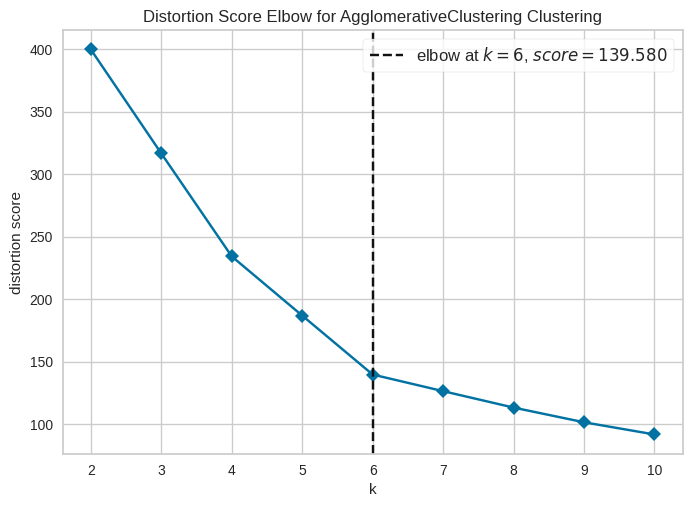

In [32]:
exp.plot_model(hclust, plot='elbow')

In [33]:
exp.plot_model(hclust, plot='distribution')